# Weights & Biases Run Visualization

This notebook loads and visualizes specific runs from Weights & Biases experiments.

In [3]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Initialize wandb API
api = wandb.Api()

# Replace with your wandb project path
PROJECT_PATH = "shkodnik-mipt/NEW_SOAP"

# Get all runs from the project
runs = api.runs(PROJECT_PATH)

In [27]:
plt.rc('axes', titlesize=40, titleweight='bold') #fontsize of the title
plt.rc('axes', labelsize=30) #fontsize of the x and y labels
plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
plt.rc('legend', fontsize=35) #fontsize of the legend
plt.rc('figure', figsize=(24, 12)) # figure size

In [6]:
def load_run_data(run):
    """Load run history into a pandas DataFrame."""
    history = run.history()
    config = {k: v for k, v in run.config.items()}
    history['run_name'] = run.name
    for k, v in config.items():
        history[f'config_{k}'] = v
    return history

## Scale Invariance Experiment

In [28]:
scale_exp = [run for run in runs if 'scale_exp' in run.tags]
scale_exp_data = pd.concat([load_run_data(run) for run in scale_exp])

In [29]:
def get_label(run_name):
    label = run_name.split("__")[0].split("_")[1]
    if "taia" in run_name: 
        if "lmo" in run_name:
            label += f" {run_name.split("lmo-")[1]}"
        else:
            label += " frobenious"
    return label

label_to_color = {
    "taia singular": "red",
    "taia frobenious": "orange",
    "adamw": "blue",
    "adam-sania": "green",
    "muon": "black",
    "sgd": "gray"
}

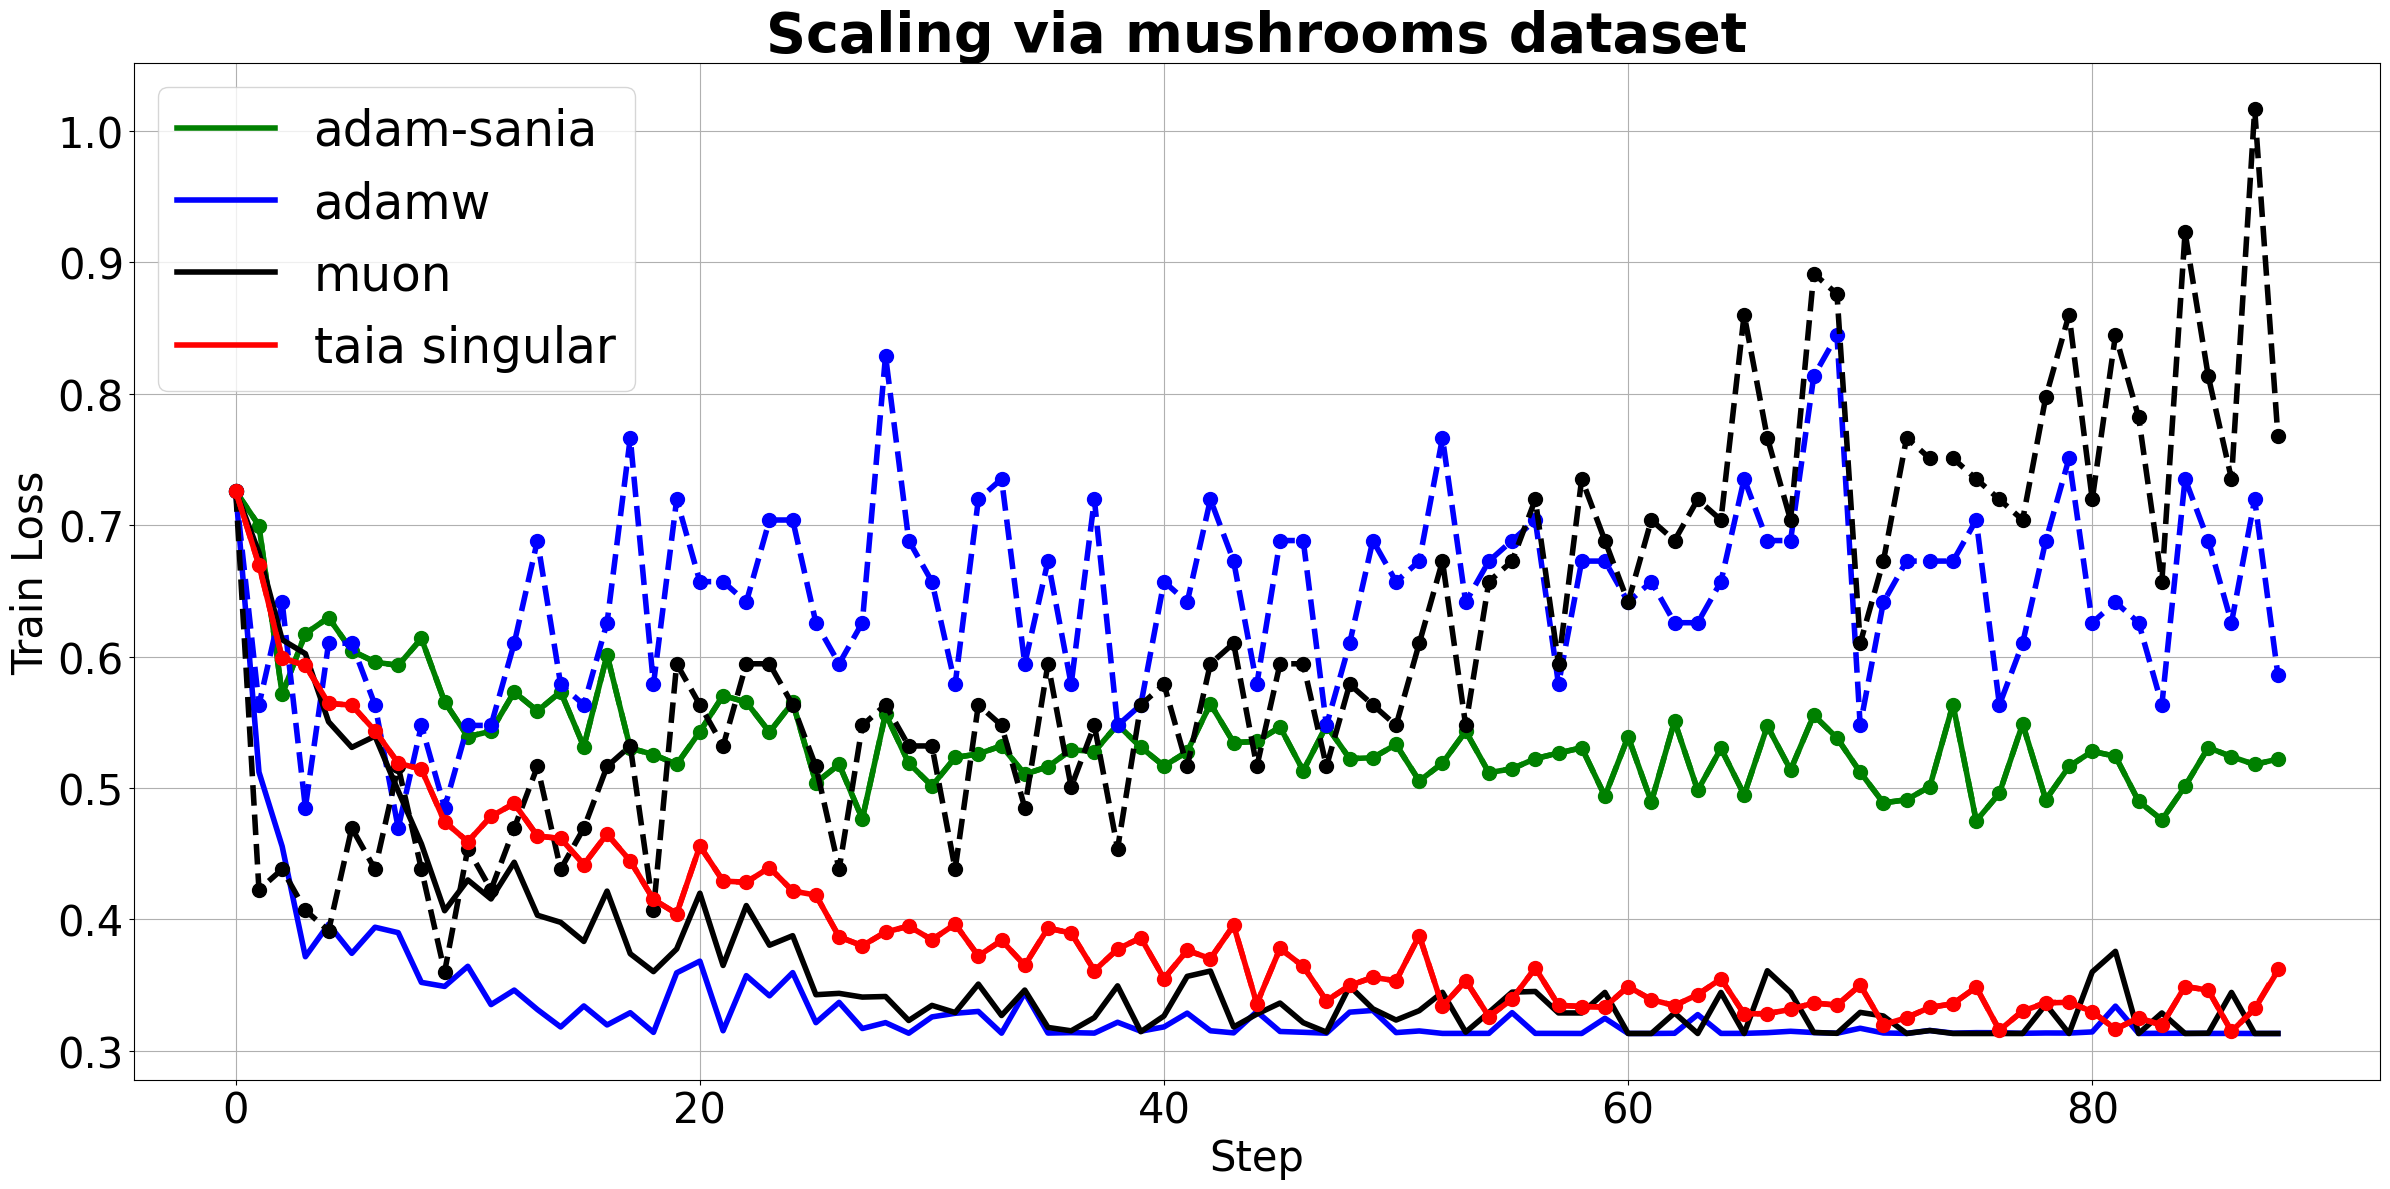

In [56]:
def plot_metric_comparison(data, metric_name, group_by='run_name'):
    """Plot comparison of a metric across different runs."""
    plt.figure(figsize=(24, 12))
    
    for name, group in data.groupby(group_by):
        label_name = get_label(name)
        if label_name not in ["taia singular", "adamw", "adam-sania", "muon"]:
            continue
        
        color = label_to_color[label_name]
        if "scale" in name:
            plt.plot(group._step, group[metric_name], label=None, 
                     linestyle="--", marker="o", markersize=10, linewidth=4,
                     color=color)
        else:
            plt.plot(group._step, group[metric_name], label=label_name, 
                     linestyle="-", linewidth=4, color=color)
        
    
    plt.grid()
    plt.xlabel('Step')
    plt.ylabel("Train Loss")
    plt.title(f'Scaling via mushrooms dataset')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metric_comparison(scale_exp_data, 'train_loss')
#plot_metric_comparison(scale_exp_data, 'test_accuracy')